In [ ]:
# Notebook Inspiration = https://github.com/NousResearch/Hermes-Function-Calling

In [ ]:
%pip install llama-cpp-python outlines

In [ ]:
!wget https://hf.co/NousResearch/Hermes-2-Pro-Llama-3-8B-GGUF/resolve/main/Hermes-2-Pro-Llama-3-8B-Q4_K_M.gguf


--2024-08-23 02:11:34--  https://hf.co/NousResearch/Hermes-2-Pro-Llama-3-8B-GGUF/resolve/main/Hermes-2-Pro-Llama-3-8B-Q4_K_M.gguf
Resolving hf.co (hf.co)... 34.198.14.237, 34.202.8.246, 34.204.155.59, ...
Connecting to hf.co (hf.co)|34.198.14.237|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://huggingface.co/NousResearch/Hermes-2-Pro-Llama-3-8B-GGUF/resolve/main/Hermes-2-Pro-Llama-3-8B-Q4_K_M.gguf [following]
--2024-08-23 02:11:34--  https://huggingface.co/NousResearch/Hermes-2-Pro-Llama-3-8B-GGUF/resolve/main/Hermes-2-Pro-Llama-3-8B-Q4_K_M.gguf
Resolving huggingface.co (huggingface.co)... 3.163.189.90, 3.163.189.114, 3.163.189.74, ...
Connecting to huggingface.co (huggingface.co)|3.163.189.90|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs-us-1.huggingface.co/repos/3d/0f/3d0f0e4d834822a4c540e3cfc58bb7e25f6d94a9581d99026f75a63b40c8c1b7/10c52a4820137a35947927be741bb411a9200329367ce2590cc675

In [ ]:
from pydantic import BaseModel, Field

class Node(BaseModel):
    """Node of the Knowledge Graph"""

    id: int = Field(..., description="Unique identifier of the node")
    label: str = Field(..., description="Label of the node")
    property: str = Field(..., description="Property of the node")


class Edge(BaseModel):
    """Edge of the Knowledge Graph"""

    source: int = Field(..., description="Unique source of the edge")
    target: int = Field(..., description="Unique target of the edge")
    label: str = Field(..., description="Label of the edge")
    property: str = Field(..., description="Property of the edge")

In [ ]:
from typing import List

class KnowledgeGraph(BaseModel):
    """Generated Knowledge Graph"""

    nodes: List[Node] = Field(..., description="List of nodes of the knowledge graph")
    edges: List[Edge] = Field(..., description="List of edges of the knowledge graph")

In [ ]:
import llama_cpp
from llama_cpp import Llama
from outlines import generate, models

llm = Llama(
    "/content/Hermes-2-Pro-Llama-3-8B-Q4_K_M.gguf",
    tokenizer=llama_cpp.llama_tokenizer.LlamaHFTokenizer.from_pretrained(
        "NousResearch/Hermes-2-Pro-Llama-3-8B"
    ),
    n_gpu_layers=-1,
    flash_attn=True,
    n_ctx=8192,
    verbose=False
)

model = models.LlamaCpp(llm)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/56.0k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/68.0 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [ ]:
from outlines.integrations.utils import convert_json_schema_to_str
from outlines.fsm.json_schema import build_regex_from_schema

json_schema = KnowledgeGraph.model_json_schema()
schema_str = convert_json_schema_to_str(json_schema=json_schema)
regex_str = build_regex_from_schema(schema_str)
regex_str

'\\{[ ]?"nodes"[ ]?:[ ]?\\[[ ]?((\\{[ ]?"id"[ ]?:[ ]?(-)?(0|[1-9][0-9]*)[ ]?,[ ]?"label"[ ]?:[ ]?"([^"\\\\\\x00-\\x1F\\x7F-\\x9F]|\\\\["\\\\])*"[ ]?,[ ]?"property"[ ]?:[ ]?"([^"\\\\\\x00-\\x1F\\x7F-\\x9F]|\\\\["\\\\])*"[ ]?\\})(,[ ]?(\\{[ ]?"id"[ ]?:[ ]?(-)?(0|[1-9][0-9]*)[ ]?,[ ]?"label"[ ]?:[ ]?"([^"\\\\\\x00-\\x1F\\x7F-\\x9F]|\\\\["\\\\])*"[ ]?,[ ]?"property"[ ]?:[ ]?"([^"\\\\\\x00-\\x1F\\x7F-\\x9F]|\\\\["\\\\])*"[ ]?\\})){0,})?[ ]?\\][ ]?,[ ]?"edges"[ ]?:[ ]?\\[[ ]?((\\{[ ]?"source"[ ]?:[ ]?(-)?(0|[1-9][0-9]*)[ ]?,[ ]?"target"[ ]?:[ ]?(-)?(0|[1-9][0-9]*)[ ]?,[ ]?"label"[ ]?:[ ]?"([^"\\\\\\x00-\\x1F\\x7F-\\x9F]|\\\\["\\\\])*"[ ]?,[ ]?"property"[ ]?:[ ]?"([^"\\\\\\x00-\\x1F\\x7F-\\x9F]|\\\\["\\\\])*"[ ]?\\})(,[ ]?(\\{[ ]?"source"[ ]?:[ ]?(-)?(0|[1-9][0-9]*)[ ]?,[ ]?"target"[ ]?:[ ]?(-)?(0|[1-9][0-9]*)[ ]?,[ ]?"label"[ ]?:[ ]?"([^"\\\\\\x00-\\x1F\\x7F-\\x9F]|\\\\["\\\\])*"[ ]?,[ ]?"property"[ ]?:[ ]?"([^"\\\\\\x00-\\x1F\\x7F-\\x9F]|\\\\["\\\\])*"[ ]?\\})){0,})?[ ]?\\][ ]?\\}'

In [ ]:
def generate_hermes_prompt(user_prompt):
    return (
        "<|im_start|>system\n"
        "You are a world class AI model who answers questions in JSON with correct Pydantic schema. "
        "Here's the json schema you must adhere to:\n<schema>\n" + str(json_schema) + "\n</schema>"
        "\n<|im_start|>user\n" + user_prompt + "<|im_end|>"
        "\n<|im_start|>assistant\n"
    )

In [ ]:
def generate_hermes_prompt(user_prompt):
    return (
        "<|im_start|>system\n"
        "You are a world class AI model who answers questions in JSON "
        f"Here's the json schema you must adhere to:\n<schema>\n{json_schema}\n</schema><|im_end|>\n"
        "<|im_start|>user\n"
        + user_prompt
        + "<|im_end|>"
        + "\n<|im_start|>assistant\n"
        "<schema>"
    )

In [ ]:
user_prompt = """

    Joseph Robinette Biden Jr. (/ˈbaɪdən/; born November 20, 1942) is an American politician who is the 46th and current president of the United States.
    A member of the Democratic Party, he previously served as the 47th vice president from 2009 to 2017 under President Barack Obama, and represented Delaware in the United States Senate from 1973 to 2009.
    Biden was born and raised in Scranton, Pennsylvania, and moved with his family to Delaware in 1953 when he was ten years old.
    He studied at the University of Delaware before earning his law degree from Syracuse University.
    He was elected to the New Castle County Council in 1970 and became the sixth-youngest senator in U.S. history after he was elected to the United States Senate from Delaware in 1972, at age 29.
    Biden was the chair or ranking member of the Senate Foreign Relations Committee for 12 years.
    He also chaired the Senate Judiciary Committee from 1987 to 1995; led the effort to pass the Violent Crime Control and Law Enforcement Act and the Violence Against Women Act; and oversaw six U.S. Supreme Court confirmation hearings, including the contentious hearings for Robert Bork and Clarence Thomas.
    Biden ran unsuccessfully for the Democratic presidential nomination in 1988 and 2008, before becoming Obama's vice president after they won the 2008 presidential election.
    During his two terms as vice president, Biden frequently represented the administration in negotiations with congressional Republicans and was a close counselor to President Obama.
    Biden and his running mate, Kamala Harris, defeated incumbent Donald Trump in the 2020 presidential election.

"""
prompt = generate_hermes_prompt(user_prompt)
print(prompt)

<|im_start|>system
You are a world class AI model who answers questions in JSON Here's the json schema you must adhere to:
<schema>
{'$defs': {'Edge': {'description': 'Edge of the Knowledge Graph', 'properties': {'source': {'description': 'Unique source of the edge', 'title': 'Source', 'type': 'integer'}, 'target': {'description': 'Unique target of the edge', 'title': 'Target', 'type': 'integer'}, 'label': {'description': 'Label of the edge', 'title': 'Label', 'type': 'string'}, 'property': {'description': 'Property of the edge', 'title': 'Property', 'type': 'string'}}, 'required': ['source', 'target', 'label', 'property'], 'title': 'Edge', 'type': 'object'}, 'Node': {'description': 'Node of the Knowledge Graph', 'properties': {'id': {'description': 'Unique identifier of the node', 'title': 'Id', 'type': 'integer'}, 'label': {'description': 'Label of the node', 'title': 'Label', 'type': 'string'}, 'property': {'description': 'Property of the node', 'title': 'Property', 'type': 'string'

In [ ]:
generator = generate.regex(model, regex_str)
response = generator(prompt, max_tokens=1024, temperature=0, seed=42)

In [ ]:
# import json

# try:
#     json_response = json.loads(response)
# except json.JSONDecodeError as e:
#     print(f"Error decoding JSON: {e}")
#     print(f"Problematic response: {response[:500]}")


Error decoding JSON: Unterminated string starting at: line 1 column 3417 (char 3416)
Problematic response: {"nodes": [{"id": 1, "label": "Joseph Robinette Biden Jr.", "property": "American politician, 46th president of the United States"}, {"id": 2, "label": "Democratic Party", "property": "Political party"}, {"id": 3, "label": "Barack Obama", "property": "47th vice president of the United States"}, {"id": 4, "label": "Delaware", "property": "State"}, {"id": 5, "label": "University of Delaware", "property": "Educational institution"}, {"id": 6, "label": "Syracuse University", "property": "Educational


In [ ]:
import json

json_response = json.loads(response)
nodes = json_response["nodes"]


In [ ]:
edges = json_response['edges']

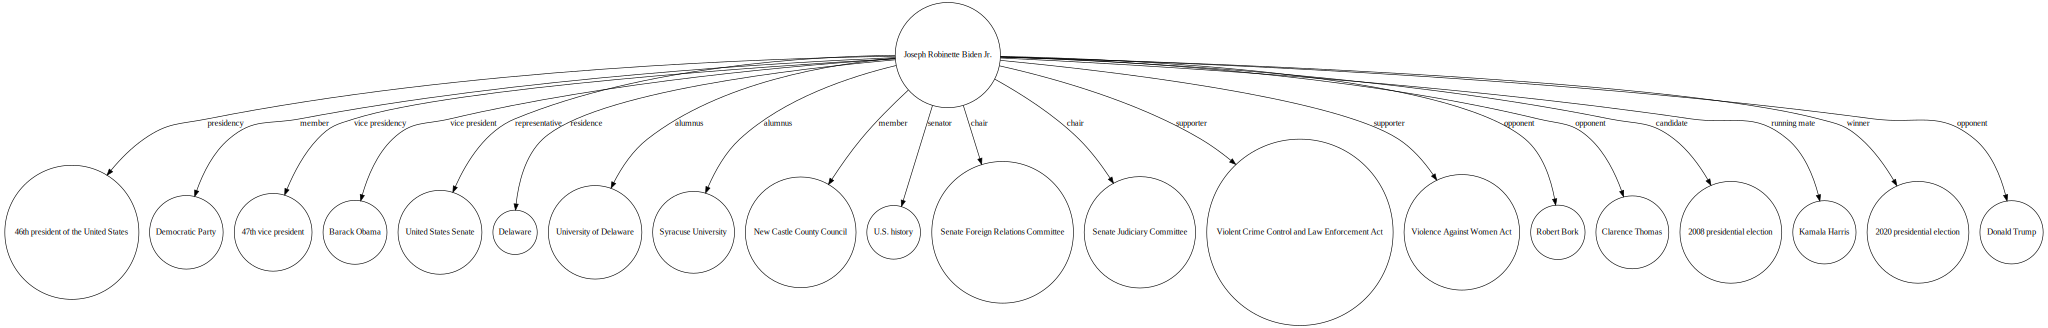

In [ ]:
from graphviz import Digraph

dot = Digraph()
for node in nodes:
    dot.node(str(node["id"]), node["label"], shape='circle', width='1', height='1')
for edge in edges:
    dot.edge(str(edge["source"]), str(edge["target"]), label=edge["label"])

dot

In [ ]:
node_map = {node['id']: node['label'] for node in nodes}

In [ ]:
triples = []
for edge in edges:
    source_label = node_map[edge['source']]
    target_label = node_map[edge['target']]
    edge_label = edge['label']
    triples.append((source_label, edge_label, target_label))

In [ ]:
triples_df = pd.DataFrame(triples, columns=['Subject', 'Predicate', 'Object'])

In [ ]:
triples_df

,Subject,Predicate,Object
0,Joseph Robinette Biden Jr.,presidency,46th president of the United States
1,Joseph Robinette Biden Jr.,member,Democratic Party
2,Joseph Robinette Biden Jr.,vice presidency,47th vice president
3,Joseph Robinette Biden Jr.,vice president,Barack Obama
4,Joseph Robinette Biden Jr.,representative,United States Senate
5,Joseph Robinette Biden Jr.,residence,Delaware
6,Joseph Robinette Biden Jr.,alumnus,University of Delaware
7,Joseph Robinette Biden Jr.,alumnus,Syracuse University
8,Joseph Robinette Biden Jr.,member,New Castle County Council
9,Joseph Robinette Biden Jr.,senator,U.S. history


In a scenario where we only need a triple associated to an entity we can use this

In [ ]:
user_prompt = """

    Joseph Robinette Biden Jr. (/ˈbaɪdən/; born November 20, 1942) is an American politician who is the 46th and current president of the United States.
    A member of the Democratic Party, he previously served as the 47th vice president from 2009 to 2017 under President Barack Obama, and represented Delaware in the United States Senate from 1973 to 2009.
    Biden was born and raised in Scranton, Pennsylvania, and moved with his family to Delaware in 1953 when he was ten years old.
    He studied at the University of Delaware before earning his law degree from Syracuse University.
    He was elected to the New Castle County Council in 1970 and became the sixth-youngest senator in U.S. history after he was elected to the United States Senate from Delaware in 1972, at age 29.
    Biden was the chair or ranking member of the Senate Foreign Relations Committee for 12 years.
    He also chaired the Senate Judiciary Committee from 1987 to 1995; led the effort to pass the Violent Crime Control and Law Enforcement Act and the Violence Against Women Act; and oversaw six U.S. Supreme Court confirmation hearings, including the contentious hearings for Robert Bork and Clarence Thomas.
    Biden ran unsuccessfully for the Democratic presidential nomination in 1988 and 2008, before becoming Obama's vice president after they won the 2008 presidential election.
    During his two terms as vice president, Biden frequently represented the administration in negotiations with congressional Republicans and was a close counselor to President Obama.
    Biden and his running mate, Kamala Harris, defeated incumbent Donald Trump in the 2020 presidential election.
    Upon inauguration, he became the oldest president in U.S. history and the first to have a female vice president.
    Biden signed the American Rescue Plan Act to help the U.S. recover from the COVID-19 pandemic and subsequent recession.
    He proposed the American Jobs Plan, aspects of which were incorporated into the bipartisan Infrastructure Investment and Jobs Act.
    He proposed the American Families Plan, which was merged with other aspects of the American Jobs Plan into the proposed Build Back Better Act.
    After facing opposition in the Senate, the Build Back Better Act's size was reduced and it was comprehensively reworked into the Inflation Reduction Act of 2022, covering deficit reduction, climate change, healthcare, and tax reform.
    Biden appointed Ketanji Brown Jackson to the Supreme Court. In foreign policy, he restored the U.S. into the Paris Agreement on climate change.
    He completed the withdrawal of U.S. troops from Afghanistan, during which the Afghan government collapsed and the Taliban seized control.
    He responded to the 2022 Russian invasion of Ukraine by imposing sanctions on Russia and authorizing foreign aid and weapons shipments to Ukraine. (en)

"""
prompt = generate_hermes_prompt(user_prompt)
print(prompt)

<|im_start|>system
You are a world class AI model who answers questions in JSON Here's the json schema you must adhere to:
<schema>
{'$defs': {'Edge': {'description': 'Edge of the Knowledge Graph', 'properties': {'source': {'description': 'Unique source of the edge', 'title': 'Source', 'type': 'integer'}, 'target': {'description': 'Unique target of the edge', 'title': 'Target', 'type': 'integer'}, 'label': {'description': 'Label of the edge', 'title': 'Label', 'type': 'string'}, 'property': {'description': 'Property of the edge', 'title': 'Property', 'type': 'string'}}, 'required': ['source', 'target', 'label', 'property'], 'title': 'Edge', 'type': 'object'}, 'Node': {'description': 'Node of the Knowledge Graph', 'properties': {'id': {'description': 'Unique identifier of the node', 'title': 'Id', 'type': 'integer'}, 'label': {'description': 'Label of the node', 'title': 'Label', 'type': 'string'}, 'property': {'description': 'Property of the node', 'title': 'Property', 'type': 'string'

In [ ]:
generator = generate.regex(model, regex_str)
response = generator(prompt, max_tokens=4096, temperature=0, seed=42)

Compiling FSM index for all state transitions: 100%|██████████| 175/175 [00:13<00:00, 12.94it/s]


In [ ]:
import json

json_response = json.loads(response)
nodes = json_response["nodes"]
edges = json_response['edges']

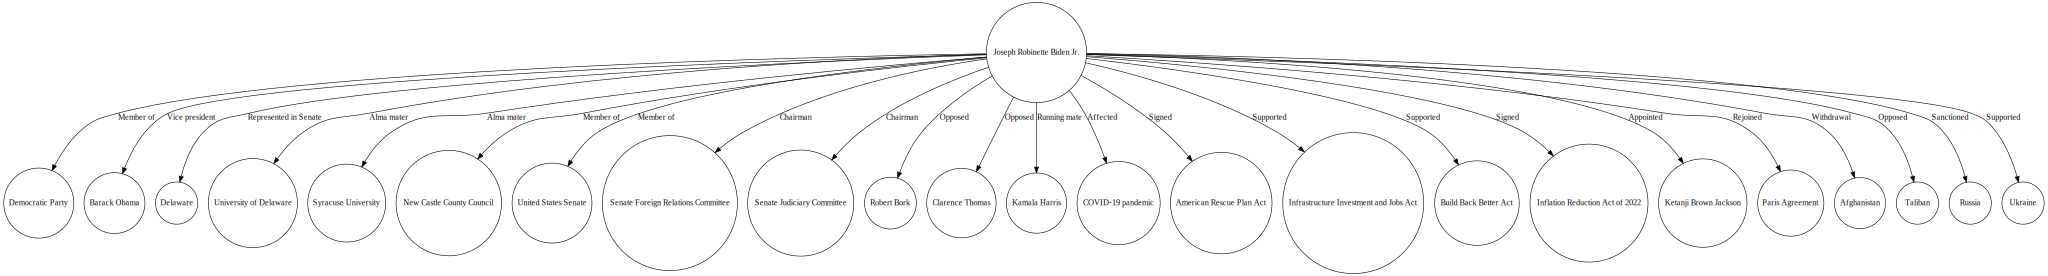

In [ ]:
from graphviz import Digraph

dot = Digraph()
for node in nodes:
    dot.node(str(node["id"]), node["label"], shape='circle', width='1', height='1')
for edge in edges:
    dot.edge(str(edge["source"]), str(edge["target"]), label=edge["label"])

dot

In [ ]:
node_map = {node['id']: node['label'] for node in nodes}

In [ ]:
triples = []
for edge in edges:
    source_label = node_map[edge['source']]
    target_label = node_map[edge['target']]
    edge_label = edge['label']
    triples.append((source_label, edge_label, target_label))

In [ ]:
import pandas as pd

triples_df = pd.DataFrame(triples, columns=['Subject', 'Predicate', 'Object'])

In [ ]:
triples_df

,Subject,Predicate,Object
0,Joseph Robinette Biden Jr.,Member of,Democratic Party
1,Joseph Robinette Biden Jr.,Vice president,Barack Obama
2,Joseph Robinette Biden Jr.,Represented in Senate,Delaware
3,Joseph Robinette Biden Jr.,Alma mater,University of Delaware
4,Joseph Robinette Biden Jr.,Alma mater,Syracuse University
5,Joseph Robinette Biden Jr.,Member of,New Castle County Council
6,Joseph Robinette Biden Jr.,Member of,United States Senate
7,Joseph Robinette Biden Jr.,Chairman,Senate Foreign Relations Committee
8,Joseph Robinette Biden Jr.,Chairman,Senate Judiciary Committee
9,Joseph Robinette Biden Jr.,Opposed,Robert Bork
